<a href="https://colab.research.google.com/github/vsilchev/hse-intro-ml/blob/master/Seminar_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [0]:
def print_model(model, columns):
    l = list(zip(columns, model.coef_))
    for col, coef in sorted(l, key=lambda x: abs(x[1]), reverse=True):
        print("{}: {}".format(col, coef))
    print("Intercept: {}".format(model.intercept_))

In [0]:
df = pd.read_csv('bike_sharing_demand.csv', parse_dates=['datetime'])

# generate datetime features
df['dayofweek'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour

In [0]:
print(df.shape)
df.head()

(10886, 15)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dayofweek,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,5,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,5,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,5,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,5,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,5,1,4


In [0]:
useless_cols = ['datetime', 'casual', 'registered', 'count', 'atemp', 'season']

In [0]:
poly_transform = PolynomialFeatures(degree=3,include_bias=False)
poly_features = poly_transform.fit_transform(df.drop(columns=useless_cols))
poly_names = poly_transform.get_feature_names(df.drop(columns=useless_cols).columns)

poly_df = pd.DataFrame(data=poly_features, columns=poly_names)
print(poly_df.shape)
poly_df.head()

(10886, 219)


,holiday,workingday,weather,temp,humidity,windspeed,dayofweek,month,hour,holiday^2,holiday workingday,holiday weather,holiday temp,holiday humidity,holiday windspeed,holiday dayofweek,holiday month,holiday hour,workingday^2,workingday weather,workingday temp,workingday humidity,workingday windspeed,workingday dayofweek,workingday month,workingday hour,weather^2,weather temp,weather humidity,weather windspeed,weather dayofweek,weather month,weather hour,temp^2,temp humidity,temp windspeed,temp dayofweek,temp month,temp hour,humidity^2,...,temp dayofweek month,temp dayofweek hour,temp month^2,temp month hour,temp hour^2,humidity^3,humidity^2 windspeed,humidity^2 dayofweek,humidity^2 month,humidity^2 hour,humidity windspeed^2,humidity windspeed dayofweek,humidity windspeed month,humidity windspeed hour,humidity dayofweek^2,humidity dayofweek month,humidity dayofweek hour,humidity month^2,humidity month hour,humidity hour^2,windspeed^3,windspeed^2 dayofweek,windspeed^2 month,windspeed^2 hour,windspeed dayofweek^2,windspeed dayofweek month,windspeed dayofweek hour,windspeed month^2,windspeed month hour,windspeed hour^2,dayofweek^3,dayofweek^2 month,dayofweek^2 hour,dayofweek month^2,dayofweek month hour,dayofweek hour^2,month^3,month^2 hour,month hour^2,hour^3
0,0.0,0.0,1.0,9.84,81.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.84,81.0,0.0,5.0,1.0,0.0,96.8256,797.04,0.0,49.2,9.84,0.00,6561.0,...,49.2,0.0,9.84,0.00,0.00,531441.0,0.0,32805.0,6561.0,0.0,0.0,0.0,0.0,0.0,2025.0,405.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125.0,25.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,9.02,80.0,0.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.02,80.0,0.0,5.0,1.0,1.0,81.3604,721.60,0.0,45.1,9.02,9.02,6400.0,...,45.1,45.1,9.02,9.02,9.02,512000.0,0.0,32000.0,6400.0,6400.0,0.0,0.0,0.0,0.0,2000.0,400.0,400.0,80.0,80.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125.0,25.0,25.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0
2,0.0,0.0,1.0,9.02,80.0,0.0,5.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.02,80.0,0.0,5.0,1.0,2.0,81.3604,721.60,0.0,45.1,9.02,18.04,6400.0,...,45.1,90.2,9.02,18.04,36.08,512000.0,0.0,32000.0,6400.0,12800.0,0.0,0.0,0.0,0.0,2000.0,400.0,800.0,80.0,160.0,320.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125.0,25.0,50.0,5.0,10.0,20.0,1.0,2.0,4.0,8.0
3,0.0,0.0,1.0,9.84,75.0,0.0,5.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.84,75.0,0.0,5.0,1.0,3.0,96.8256,738.00,0.0,49.2,9.84,29.52,5625.0,...,49.2,147.6,9.84,29.52,88.56,421875.0,0.0,28125.0,5625.0,16875.0,0.0,0.0,0.0,0.0,1875.0,375.0,1125.0,75.0,225.0,675.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125.0,25.0,75.0,5.0,15.0,45.0,1.0,3.0,9.0,27.0
4,0.0,0.0,1.0,9.84,75.0,0.0,5.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.84,75.0,0.0,5.0,1.0,4.0,96.8256,738.00,0.0,49.2,9.84,39.36,5625.0,...,49.2,196.8,9.84,39.36,157.44,421875.0,0.0,28125.0,5625.0,22500.0,0.0,0.0,0.0,0.0,1875.0,375.0,1500.0,75.0,300.0,1200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125.0,25.0,100.0,5.0,20.0,80.0,1.0,4.0,16.0,64.0


In [0]:
Y = df['count']
X_poly_train, X_poly_test, Y_train, Y_test = train_test_split(poly_features, Y, shuffle=False)

In [0]:
my_little_poly = Lasso(alpha=40.0).fit(X_poly_train, Y_train)
print_model(my_little_poly, poly_names)
mean_squared_error(Y_test, my_little_poly.predict(X_poly_test))

hour^2: 1.635066880319692
temp hour: 0.6513454743918755
temp^2: 0.519598992658329
humidity hour: 0.21689209969543138
workingday weather humidity: -0.17488483234055321
humidity month: 0.16886315049903394
weather^2 humidity: -0.12505109092709385
weather hour^2: 0.11189441140988285
workingday temp^2: -0.10758040001633655
hour^3: -0.10328756959791954
windspeed^2: -0.09402973536391615
windspeed month^2: -0.0765095269840029
dayofweek month^2: 0.07406705683591804
weather temp hour: -0.06988584172500444
temp dayofweek^2: 0.04318053650948648
dayofweek^2 hour: -0.04076610802629102
temp^2 dayofweek: 0.038952054522574504
windspeed dayofweek month: 0.037754636608369495
temp dayofweek hour: -0.035805754289340755
weather humidity hour: -0.029535957711648693
weather humidity dayofweek: 0.028075727420573033
windspeed dayofweek hour: -0.027818894562178825
temp windspeed month: 0.027239400462468182
humidity windspeed: 0.026986706709079565
weather temp windspeed: -0.026911578219579024
weather windspeed ho

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47296597.23709862, tolerance: 21130.302942515926
  positive)


31712.8508947649

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47516935.681920126, tolerance: 21130.302942515926
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47527460.97295877, tolerance: 21130.302942515926
  positive)


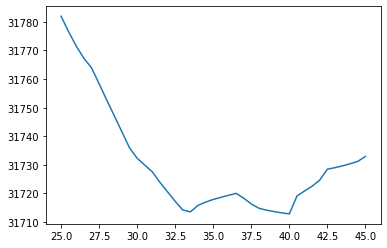

In [0]:
alpha_array = np.linspace(25, 45, 41)
loss_array = np.array([mean_squared_error(Y_test, Lasso(alpha=alpha).fit(X_poly_train, Y_train).predict(X_poly_test)) for alpha in alpha_array]);


plt.plot(alpha_array, loss_array)

In [0]:
sorted_cols = [name
               for name, val
               in sorted(zip(poly_names, my_little_poly.coef_), key=lambda x: abs(x[1]), reverse=True)]

In [0]:
sorted_cols[:10]

['hour^2',
 'temp hour',
 'temp^2',
 'humidity hour',
 'workingday weather humidity',
 'humidity month',
 'weather^2 humidity',
 'weather hour^2',
 'workingday temp^2',
 'hour^3']

In [0]:
X_poly_train, X_poly_test, Y_train, Y_test = train_test_split(poly_df[sorted_cols[:10]], Y, shuffle=False)

In [0]:
my_rage_poly = Ridge().fit(X_poly_train, Y_train)
print_model(my_rage_poly, sorted_cols[:10])
mean_squared_error(Y_test, my_rage_poly.predict(X_poly_test))

hour^2: 2.263535137228668
temp hour: 0.5533304048566515
workingday weather humidity: 0.3150722306479
weather^2 humidity: -0.11412249684894912
hour^3: -0.10215877962728963
workingday temp^2: -0.08369854248152178
humidity hour: -0.0534650839819447
weather hour^2: -0.050353619775177556
temp^2: 0.03967420678128333
humidity month: 0.006678346643497428
Intercept: 9.02985603018547


31174.99169736054

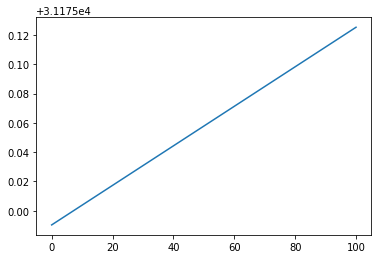

In [0]:
alpha_array = np.linspace(0, 100, 21)
loss_array = np.array([mean_squared_error(Y_test, Ridge(alpha=alpha).fit(X_poly_train, Y_train).predict(X_poly_test)) for alpha in alpha_array])


plt.plot(alpha_array, loss_array)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.90622e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.94094e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.94889e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.94453e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.94619e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAl

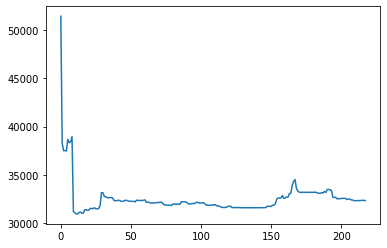

In [0]:
col_num = range(1, len(sorted_cols))
loss_array = []

for i in col_num:
    X_poly_train, X_poly_test, Y_train, Y_test = train_test_split(poly_df[sorted_cols[:i]], Y, shuffle=False)
    loss_array.append(mean_squared_error(Y_test, Ridge(alpha=0.1).fit(X_poly_train, Y_train).predict(X_poly_test)))

plt.plot(loss_array)